#  MAJOR PROJECT

# DATA SCIENCE PROJECT ON : <span style="color: blue"> LIFE EXPECTANCY ANALYSIS </span>

by:<span style="color: green"> KEERTHIKA.R</span>.

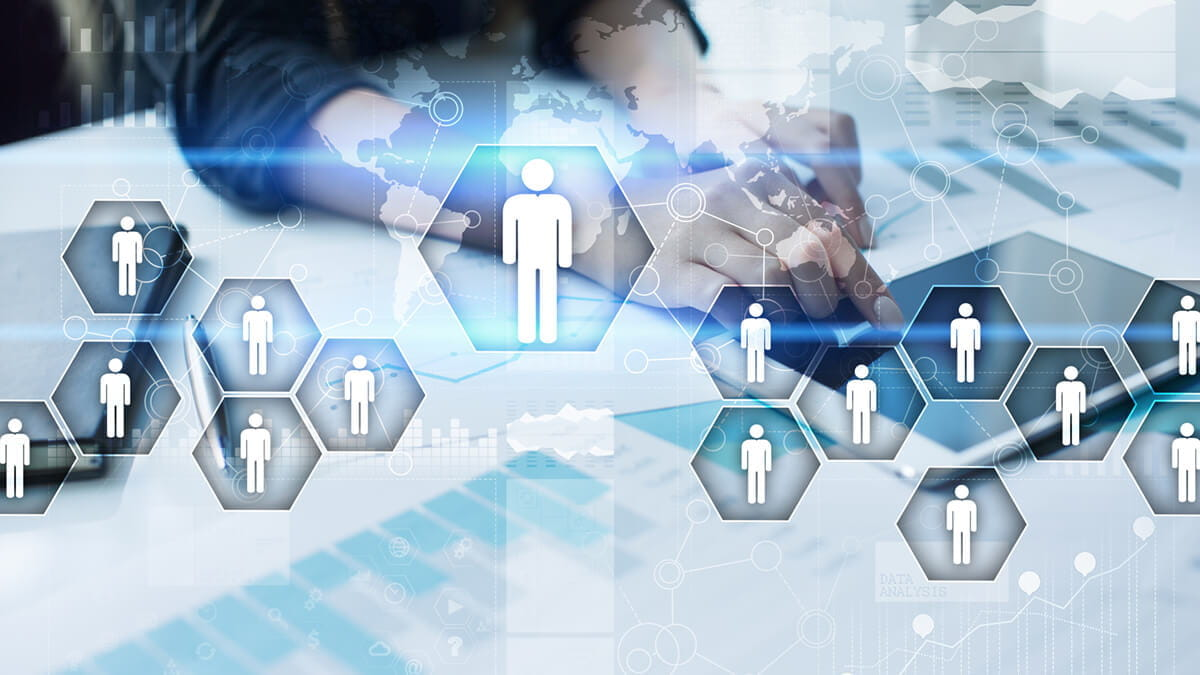

# <span style="color: green">Here you can get data source </span>

[life expectancy Data](https://docs.google.com/spreadsheets/d/1mz3sVk0s297K290DP6ix_EXKm0_8yEjDOkC__9FhwPo/edit#gid=1171730417/koolac "Just click it")

# <span style="color: blue"> OBJECTIVE OF THIS PROJECT</span>

1.To study the effect of number of year a person expected to live based on statistical average ,Act as a data reseacher for the World Health Organization
(Refers to the average time an organism is expected to live, based on the year of its birth, its current age, and other demographic factors)

2.Import and Dataset load

3.Data Cleaning

4.Data and Variable description

5.outlier

6.outlier detection

7.Data Exploration and formulating visualization stratergies

8.Checking Correlation and Plotting heatmap

9.Plotting the characteristics between Status of countries and the average life expectancy

10.Life expectancy evolution

11.GDP and Life_expectancy_over time

12.Plotting Actual vs Predicted

13.Regression Plots(different fator affect the ligh expectancy)

14CONCLUSION

[DASHBOARD]


<b> Reading the data

The data is saved as a csv file as LifeExpectancy.csv and it is read and stored in the dataset variable.
The Year column is dropped as it will not be used in the analysis. Below the first 5 rows are shown. The data contains
21 columns and 2938 rows with the header row. The table contains data about:

Country,Status,Life Expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,
Polio,Total expenditureDiphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,
Income composition of resources,Schooling.

With the exclution of Country name and Status(either developed or developing) all of the data is numeric.
The values are either in years, precentages, millions or dollars in the case of Gross Domestic Pro

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years

Goal: Find a set of features that affect Life Expectancy.



# <span style="color: blue"> METHODOLOGY :</span>

Dataset converted to pandas Dataframe

Extensive usage of python Libraries:<span style="color: green"> pandas and numpy </span>.to manage the data
    
For visualization ,python Libraries: <span style="color: green"> Matplotlib ,seaborn, and plotly </span>.is used 

<span style="color: green> scatter_matrix()</span> to easily generate a group of scatter plots between all pairs of numerical features.
    
Entire project has been made in <span style="color:green"> Jupyter Notebook</span>

machine learning algorithms has been used briefly 

#  <span style="color: blue">IMPORTING LIBRARIES:</span>

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
sns.set()
import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize


# <span style="color:blue">LOADING DATA:</span>

In [2]:
data = pd.read_csv("Life Expectancy Data.csv") #reading thdata
data.head(3)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  

[3 rows x 22 columns]

In [3]:
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [4]:
data.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

# <span style="color: blue">Data Cleaning</span>

In order to properly clean the data, it is important to understand the variables presented in the data. There are a number of things important to know about each variable:

What does the variable mean and what type of variable is it (Nominal/Ordinal/Interval/Ratio)?

Does the variable have missing values? If so, what should be done about them?

Does the variable have outliers? If so, what should be done about them?

# <span style="color: blue">Dataset Description</span>

In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data.rename(columns={" BMI ":"BMI",
                     "Life expectancy ":"Life_Expectancy",
                     "Adult Mortality":"Adult_Mortality",
                     "infant deaths":"Infant_Deaths",
                     "percentage expenditure":"Percentage_Expenditure",
                     "Hepatitis B":"Hepatitis_B",
                     "Measles ":"Measles",
                     "BMI ":"BMI",
                     "under-five deaths ":"Under_Five_Deaths",
                     "Diphtheria ":"Diphtheria",
                     " HIV/AIDS":"HIV/AIDS",
                     " thinness  1-19 years":"thinness_1to19_years",
                     " thinness 5-9 years":"thinness_5to9_years",
                     "Income composition of resources":"Income_Composition_Of_Resources",
                     "Total expenditure":"Total_Expenditure"},inplace=True)
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

#  <span style="color: blue"> Variable Descriptions</span>


--><span style="color: green"> country </span>(Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

--><span style="color: green"> year </span>(Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

--><span style="color: green"> status</span> (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

--><span style="color: green"> life_expectancy</span> (Ratio) - the life expectancy of people in years for a particular country and year

--<<span style="color: green"> adult_mortality</span> (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

--><span style="color: green"> infant_deaths</span> (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

--><span style="color: green"> alcohol </span>(Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

--><span style="color: green"> percentage_expenditure </span>(Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

--><span style="color: green"> hepatitis_b </span>(Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

--><span style="color: green"> measles </span>(Ratio) - number of reported Measles cases per 1000 population

--><span style="color: green"> bmi</span>(Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

--><span style="color: green"> under-five_deaths </span>(Ratio) - number of people under the age of five deaths per 1000 population

--><span style="color: green"> polio</span> (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

--><span style="color: green"> total_expenditure</span>(Ratio) - government expenditure on health as a percentage of total government expenditure

--><span style="color: green"> diphtheria</span> (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

--><span style="color: green"> hiv/aids </span>(Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

--><span style="color: green"> gdp</span> (Ratio) - Gross Domestic Product per capita

--><span style="color: green"> population </span>(Ratio) - population of a country


--><span style="color: green"> thinness_1-19_years </span>(Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

--><span style="color: green"> thinness_5-9_years </span>(Ratio) - rate of thinness among people aged 5-9

--><span style="color: green"> income_composition_of_resources </span>(Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

--><span style="color: green"> schooling </span> (Ratio) - average number of years of schooling of a population

In [118]:
data.shape

(2938, 22)

In [119]:
data.size

64636

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   Infant_Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_Expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_Five_Deaths                2938 non-null   int64  
 12  Polio               

# <span style="color: blue">  Looking for the Missing Values </span>

In [121]:
data.duplicated().sum()

0

In [122]:
data.isnull().values.any()

True

In [123]:
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

display(find_missing_data(data))

Total  Percent
Population                         652     0.22
Hepatitis_B                        553     0.19
GDP                                448     0.15
Total_Expenditure                  226     0.08
Alcohol                            194     0.07
Income_Composition_Of_Resources    167     0.06
Schooling                          163     0.06
thinness_5to9_years                 34     0.01
thinness_1to19_years                34     0.01
BMI                                 34     0.01
Polio                               19     0.01
Diphtheria                          19     0.01
Life_Expectancy                     10     0.00
Adult_Mortality                     10     0.00
HIV/AIDS                             0     0.00
Country                              0     0.00
Year                                 0     0.00
Measles                              0     0.00
Percentage_Expenditure               0     0.00
Infant_Deaths                        0     0.00
Status                               0     0.00
Under_Five_Deaths                    0     0.00

Things that may not make sense from the perspective of the above:

An adult mortality rate of 10? This is most certainly a measurement error, but what numbers make sense in this situation? 
If the value falls below a specific threshold, it may be necessary to convert it to null.
Is it possible that the infant mortality rate is as low as 0 per 1000? 
That's not conceivable, therefore I'm going to assume those values are null.
On the other hand, 1800 is most likely an anomaly, although it is feasible in a country with extremely high birthrates
and a relatively
small population total - this can be addressed later.

What's the difference between a BMI of 1 and a BMI of 34.3? 
If that were the case.Because a BMI of 15 or below is considered severely underweight, and a BMI of 40 or above 
is considered morbidly obese, many of these measures appear to be unrealistic...this variable may not be worth 
investigating further.
Similar to newborn deaths, values of zero are unlikely (if not impossible) in the Under Five Deaths category.
Is it feasible to have a GDP per capita as low as $1.68 (USD).
For a whole nation, the population is 653

In [124]:
groupby_country = data.groupby(['Country'])
groupby_country

In [125]:
def fill_null(series):
    return series.fillna(series.mean())

data["Population"] = groupby_country["Population"].transform(fill_null)
data["Hepatitis_B"] = groupby_country["Hepatitis_B"].transform(fill_null)
data["GDP"] = groupby_country["GDP"].transform(fill_null)
data["Total_Expenditure"] = groupby_country["Total_Expenditure"].transform(fill_null)
data["Alcohol"] = groupby_country["Alcohol"].transform(fill_null)
data["Income_Composition_Of_Resources"] = groupby_country["Income_Composition_Of_Resources"].transform(fill_null)
data["Schooling"] = groupby_country["Schooling"].transform(fill_null)
data["thinness_1to19_years"] = groupby_country["thinness_1to19_years"].transform(fill_null)
data["thinness_5to9_years"] = groupby_country["thinness_5to9_years"].transform(fill_null)
data["Diphtheria"] = groupby_country["Diphtheria"].transform(fill_null)
data["Polio"] = groupby_country["Polio"].transform(fill_null)
data["Adult_Mortality"] = groupby_country["Adult_Mortality"].transform(fill_null)
data["Life_Expectancy"] = groupby_country["Life_Expectancy"].transform(fill_null)

In [126]:
data.isnull().values.any()

True

In [127]:
data.dropna(inplace=True) #There were still missing data fields, that's why null rows are dropped.


In [128]:
data.isnull().values.any()

False

 # <span style="color: blue"> Outliers</span>

In [163]:
col_dict = {'Life_Expectancy':1 , 'Adult_Mortality':2 ,
        'Alcohol':3 , 'Percentage_Expenditure': 4, 'Hepatitis_B': 5,
       'Measles' : 6, 'BMI': 7, 'Under_Five_Deaths' : 8, 'Polio' : 9, 'Total_Expenditure' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'thinness_1to19_years' :15, 'thinness_5to9_years' :16,
       'Income_Composition_Of_Resources' : 17, 'Schooling' :18, 'Infant_Deaths':19}

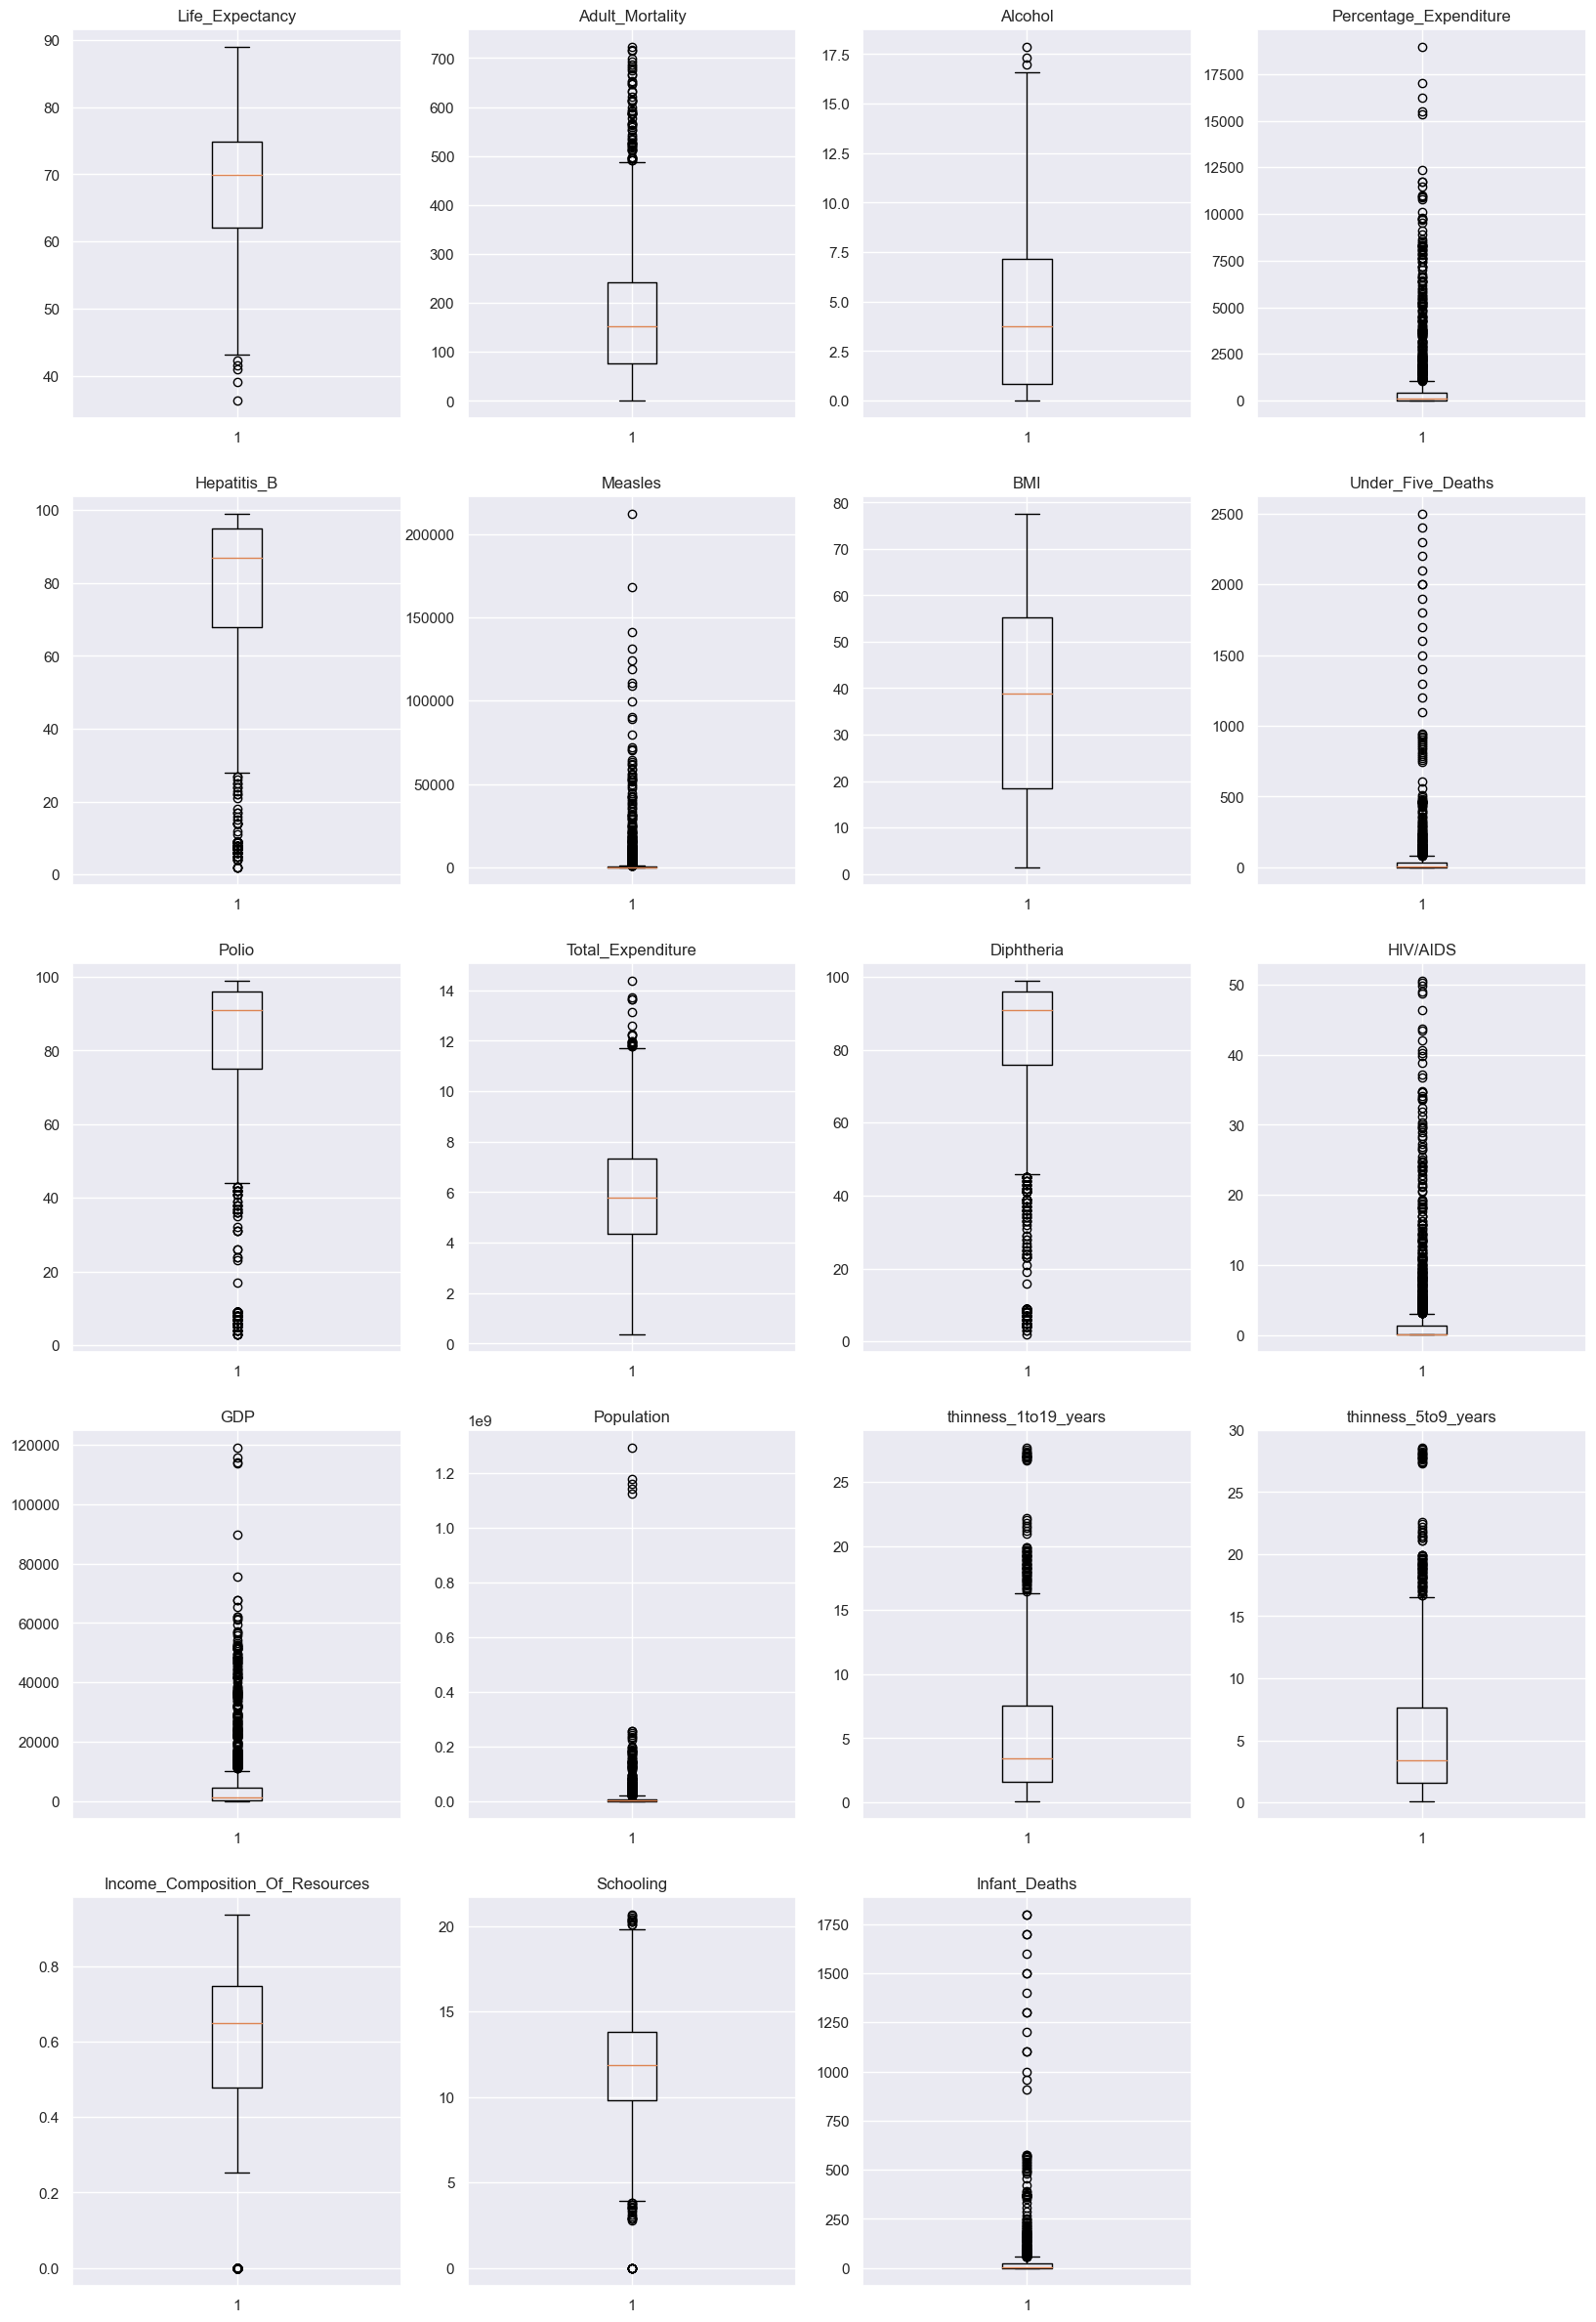

In [164]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

Infant_Deaths represents number of Infant Deaths per 1000 population. That is why number beyond 1000 is unrealistic. So we will remove them as outliers.

Same applies to Measles and Under_five_deaths because both are number per 1000 population.

As we can see that some countries are spending as high as 20000% of their GDP on health. Most of the countires are spending under 2500% of their GDP on health. Since values are very large in columns of Percentage_expenditure, GDP, and Population, it's better to take a log value or use winsorization if required.

The BMI values are very unrealistic because the value more 40 considered as extreme obesity. The median is more than 40. and some country/countries has mean around 60 which is not possible. We may drop that entire column.

Since pretty much every column other has outliers we can use winsorization.

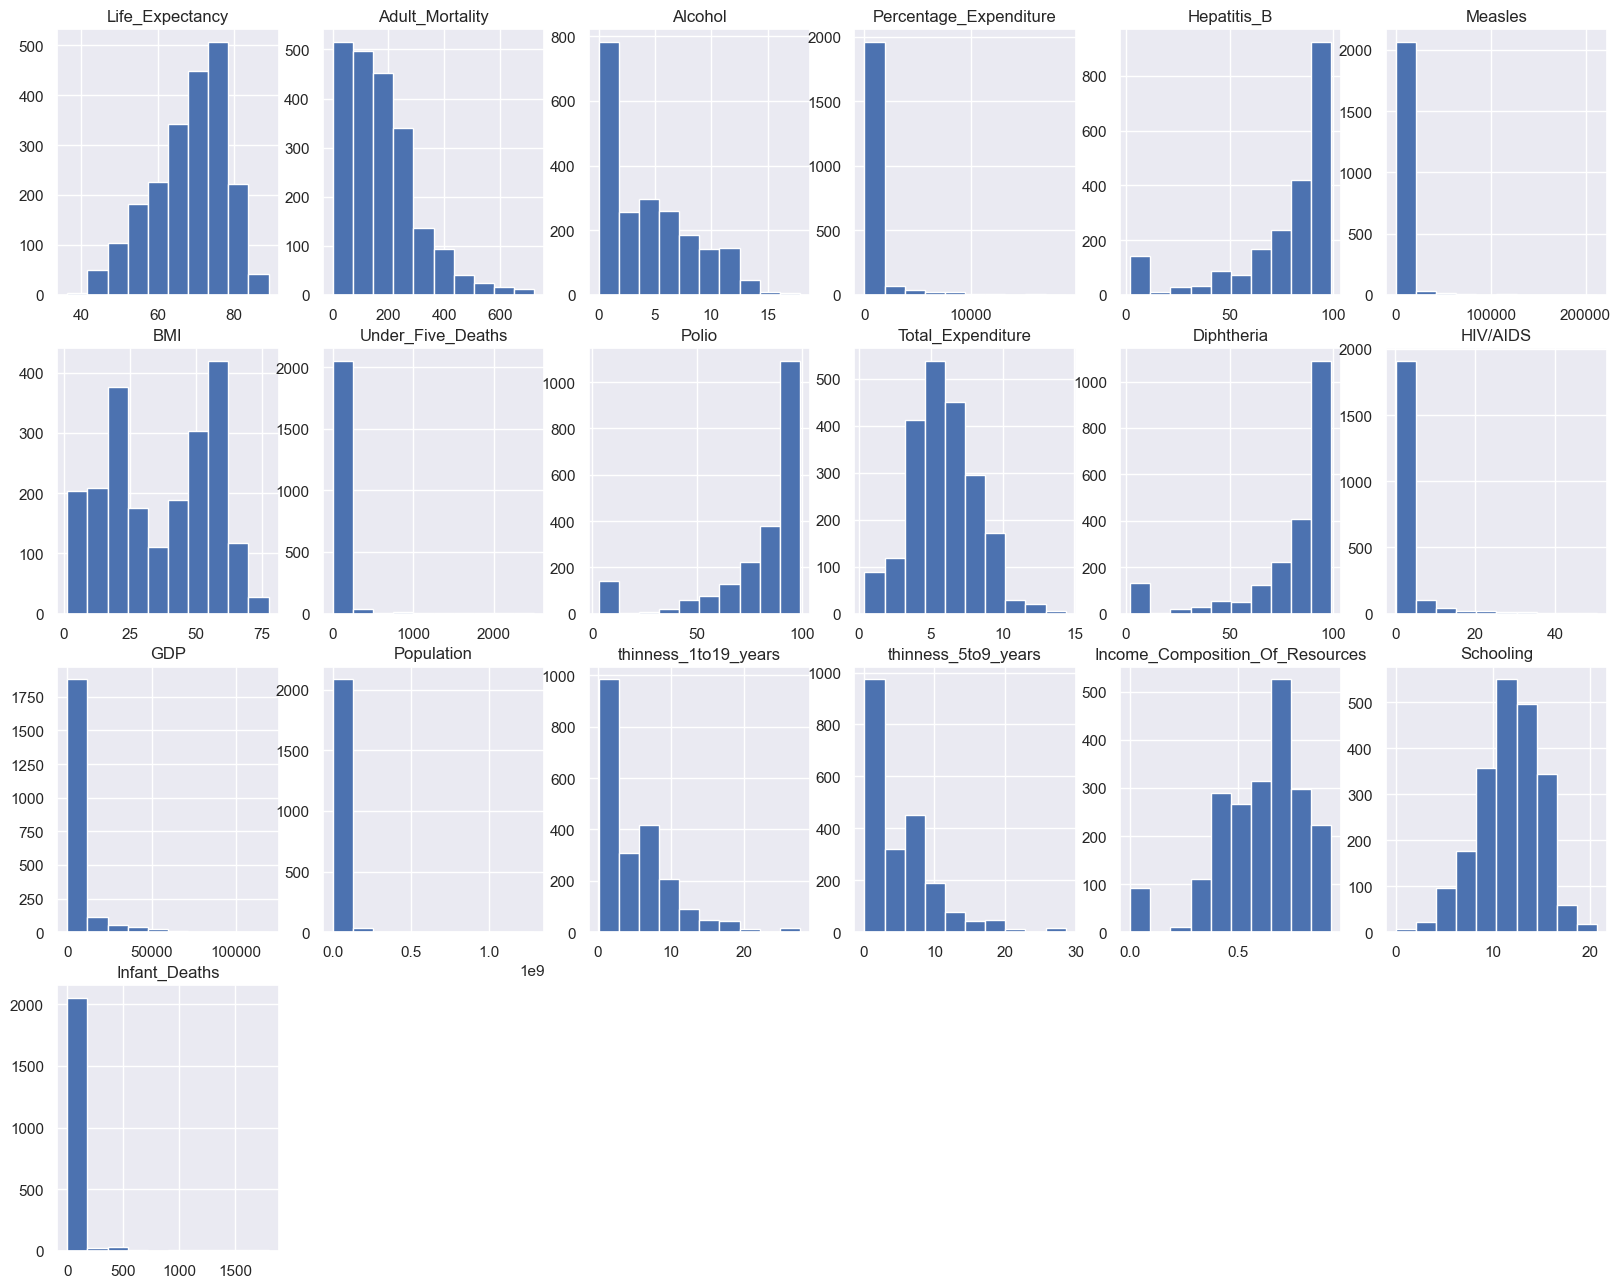

In [165]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict.items():
                     plt.subplot(5,6,i)
                     plt.hist(data[variable])
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()


<b> Boxplot + histogram plot of Outlier

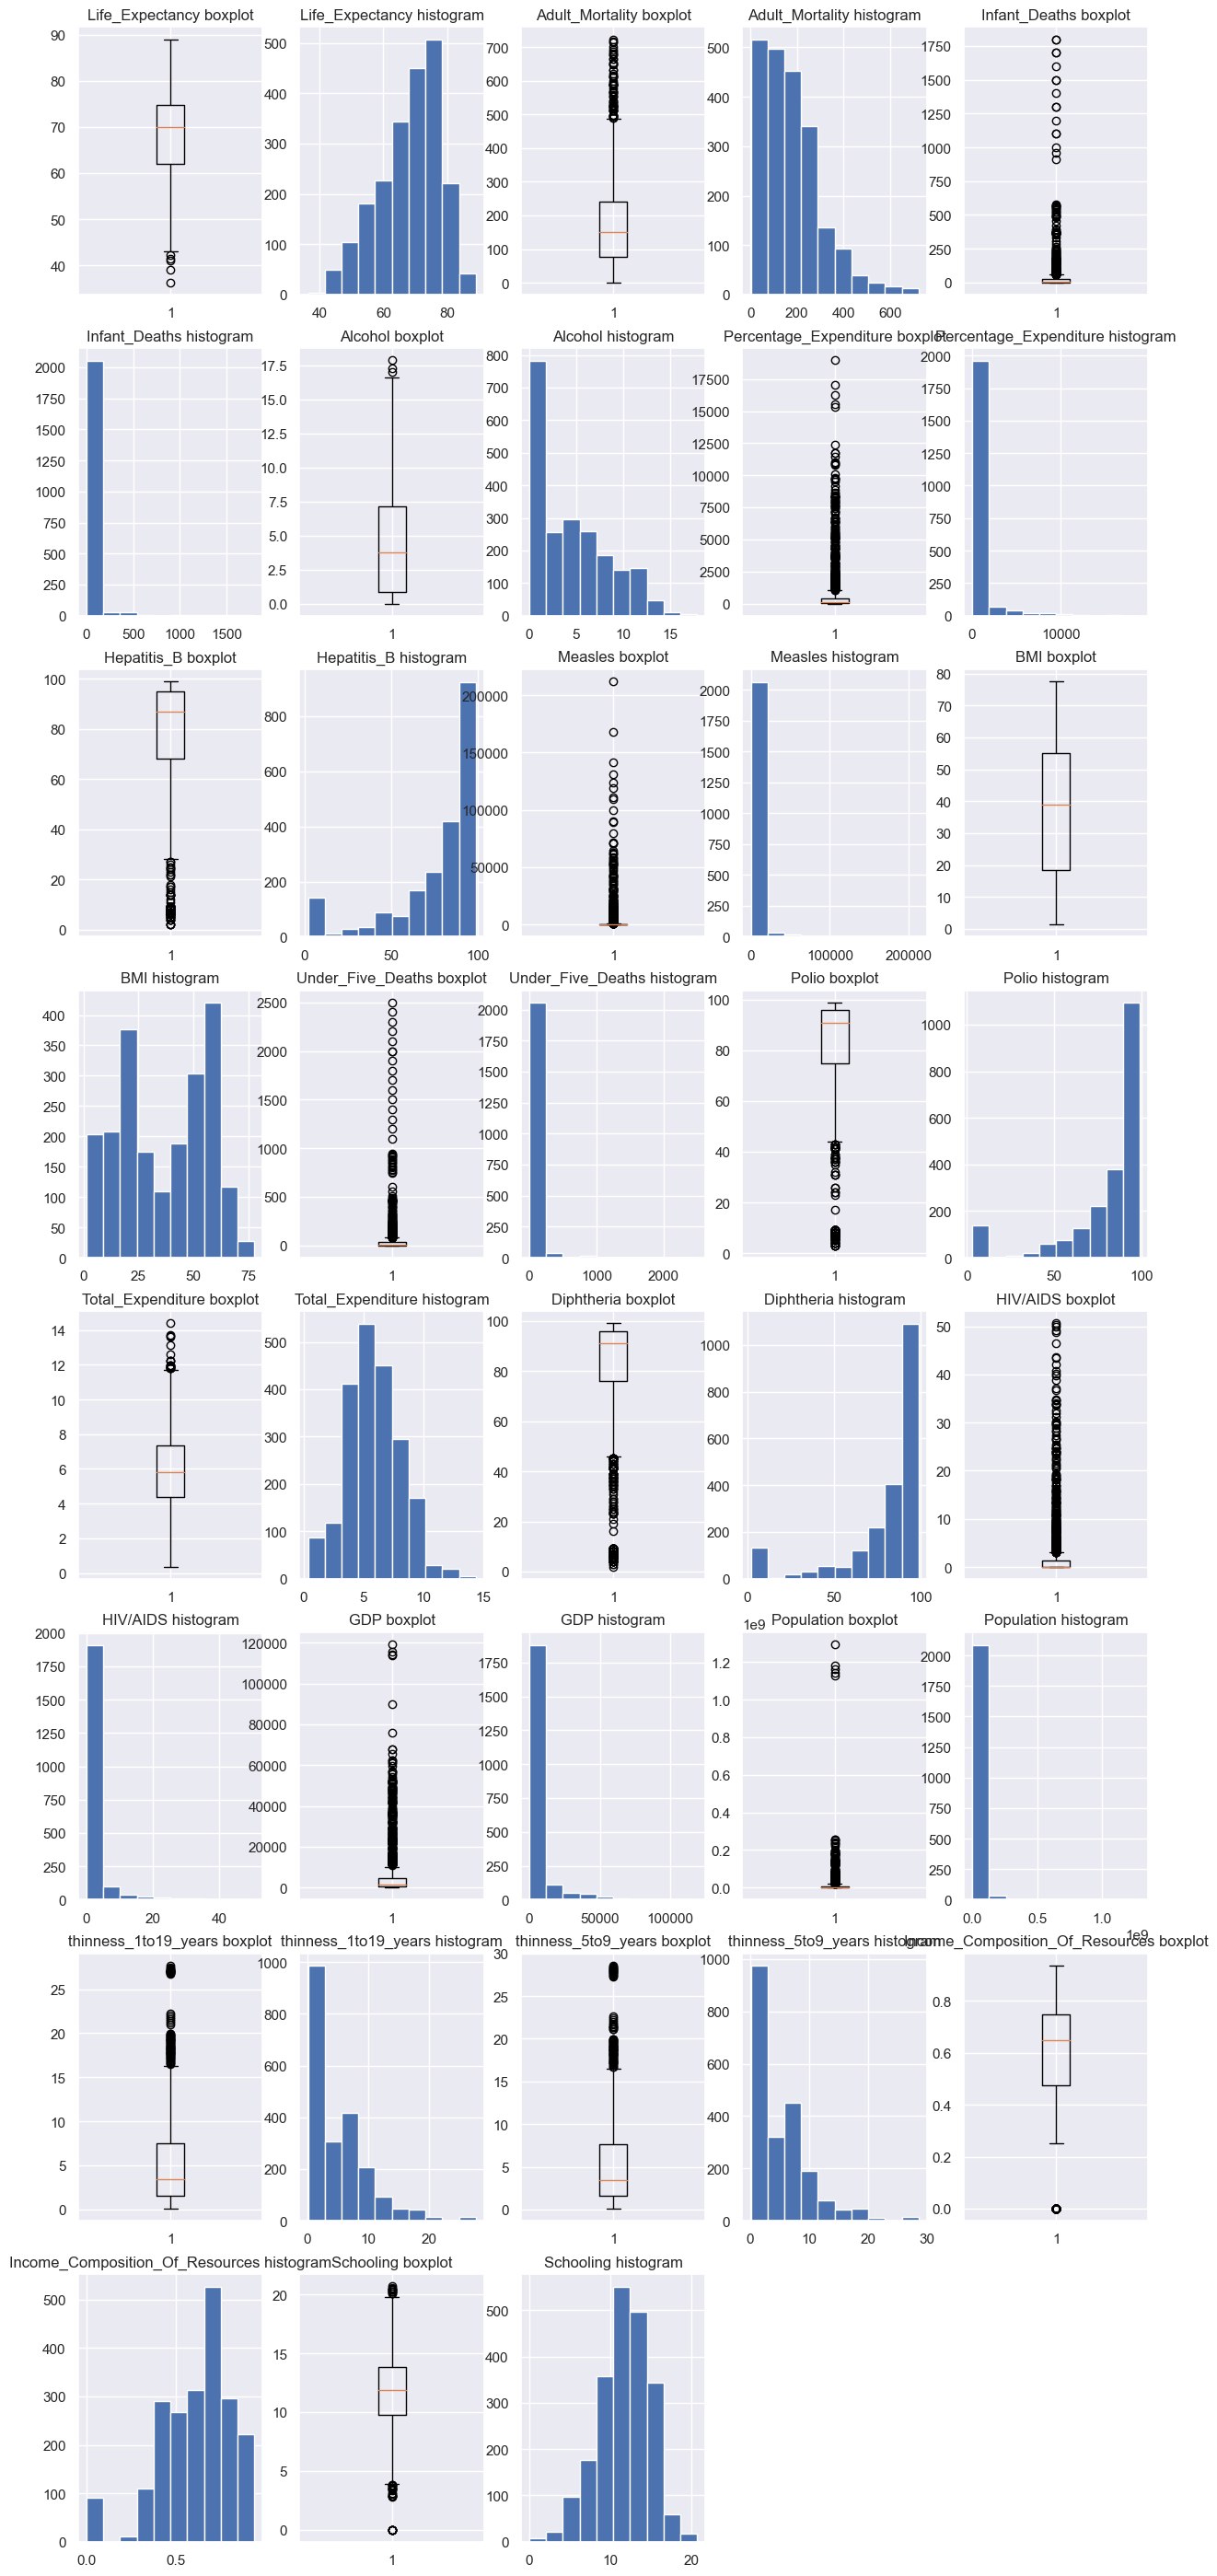

In [166]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for columns in cont_vars:
        i += 1
        plt.subplot(9, 5, i)
        plt.boxplot(data[columns])
        plt.title('{} boxplot'.format(columns))
        i += 1
        plt.subplot(9, 5, i)
        plt.hist(data[columns])
        plt.title('{} histogram'.format(columns))
    plt.show()
outliers_visual(data)

# <span style="color: blue">Outlier Detection</span>

In [177]:
def outlier_count(col, data=data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [178]:
for col in cont_vars:
    outlier_count(col)

---------------Life_Expectancy---------------
Number of outliers: 5
Percent of data that is outlier: 0.23%
---------------Adult_Mortality---------------
Number of outliers: 61
Percent of data that is outlier: 2.87%
---------------Infant_Deaths---------------
Number of outliers: 225
Percent of data that is outlier: 10.57%
---------------Alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.14%
---------------Percentage_Expenditure---------------
Number of outliers: 251
Percent of data that is outlier: 11.8%
---------------Hepatitis_B---------------
Number of outliers: 165
Percent of data that is outlier: 7.75%
---------------Measles---------------
Number of outliers: 393
Percent of data that is outlier: 18.47%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Under_Five_Deaths---------------
Number of outliers: 251
Percent of data that is outlier: 11.8%
---------------Polio---------------
Number of outl

In [179]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(data[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(data[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

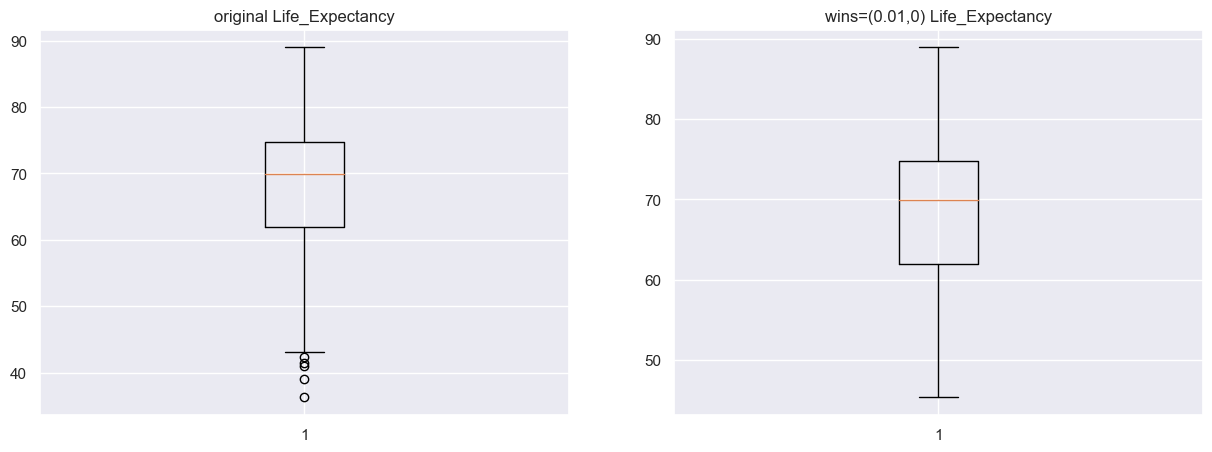

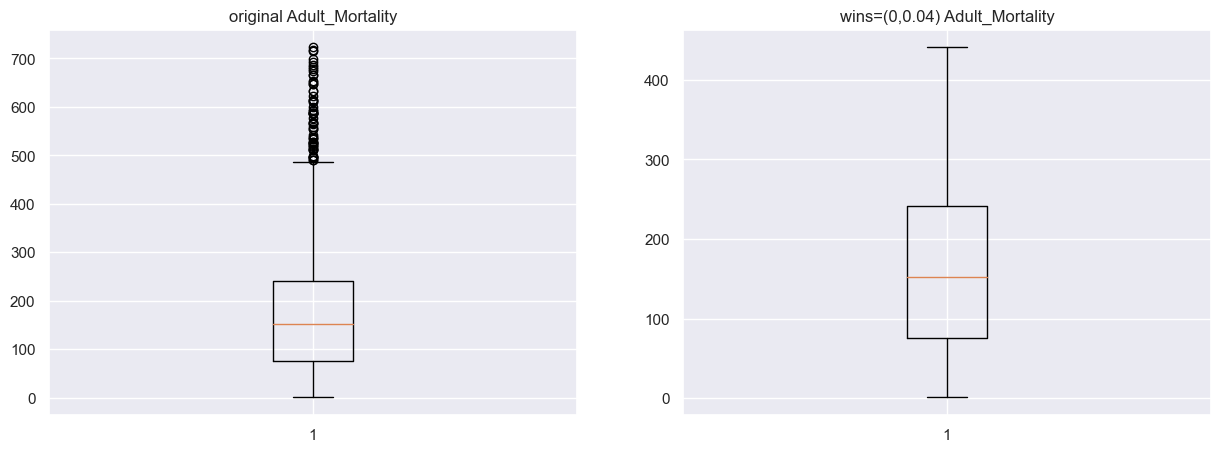

In [180]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

All of the variables have now been winsorized as little as possible in order to preserve as much
data as feasible while still removing outliers. Finally, little boxplots for each variable's 
winsorized data will be provided to
demonstrate that the outliers have been dealt with.

# <span style="color: blue">  Data Exploration and formulating visualization stratergies </span>

In [ ]:
country_unique=data["Country"].unique()
country_unique

In [33]:
data["Country"].nunique()

193

In [34]:
year_unique=data["Year"].unique()
year_unique

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [35]:
year_nunique=data["Year"].nunique()
year_nunique


16

In [36]:
data["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [37]:
pd.options.display.float_format = '{:.2f}'.format

data.describe(include='all')

Country    Year      Status  Life_Expectancy  Adult_Mortality  \
count          2938 2938.00        2938          2928.00          2928.00   
unique          193     NaN           2              NaN              NaN   
top     Afghanistan     NaN  Developing              NaN              NaN   
freq             16     NaN        2426              NaN              NaN   
mean            NaN 2007.52         NaN            69.22           164.80   
std             NaN    4.61         NaN             9.52           124.29   
min             NaN 2000.00         NaN            36.30             1.00   
25%             NaN 2004.00         NaN            63.10            74.00   
50%             NaN 2008.00         NaN            72.10           144.00   
75%             NaN 2012.00         NaN            75.70           228.00   
max             NaN 2015.00         NaN            89.00           723.00   

        Infant_Deaths  Alcohol  Percentage_Expenditure  Hepatitis_B   Measles  \
count         2938.00  2744.00                 2938.00      2385.00   2938.00   
unique            NaN      NaN                     NaN          NaN       NaN   
top               NaN      NaN                     NaN          NaN       NaN   
freq              NaN      NaN                     NaN          NaN       NaN   
mean            30.30     4.60                  738.25        80.94   2419.59   
std            117.93     4.05                 1987.91        25.07  11467.27   
min              0.00     0.01                    0.00         1.00      0.00   
25%              0.00     0.88                    4.69        77.00      0.00   
50%              3.00     3.75                   64.91        92.00     17.00   
75%             22.00     7.70                  441.53        97.00    360.25   
max           1800.00    17.87                19479.91        99.00 212183.00   

        ...   Polio  Total_Expenditure  Diphtheria  HIV/AIDS       GDP  \
count   ... 2919.00            2712.00     2919.00   2938.00   2490.00   
unique  ...     NaN                NaN         NaN       NaN       NaN   
top     ...     NaN                NaN         NaN       NaN       NaN   
freq    ...     NaN                NaN         NaN       NaN       NaN   
mean    ...   82.55               5.94       82.32      1.74   7483.16   
std     ...   23.43               2.50       23.72      5.08  14270.17   
min     ...    3.00               0.37        2.00      0.10      1.68   
25%     ...   78.00               4.26       78.00      0.10    463.94   
50%     ...   93.00               5.75       93.00      0.10   1766.95   
75%     ...   97.00               7.49       97.00      0.80   5910.81   
max     ...   99.00              17.60       99.00     50.60 119172.74   

          Population  thinness_1to19_years  thinness_5to9_years  \
count        2286.00               2904.00              2904.00   
unique           NaN                   NaN                  NaN   
top              NaN                   NaN                  NaN   
freq             NaN                   NaN                  NaN   
mean     12753375.12                  4.84                 4.87   
std      61012096.51                  4.42                 4.51   
min            34.00                  0.10                 0.10   
25%        195793.25                  1.60                 1.50   
50%       1386542.00                  3.30                 3.30   
75%       7420359.00                  7.20                 7.20   
max    1293859294.00                 27.70                28.60   

        Income_Composition_Of_Resources  Schooling  
count                           2771.00    2775.00  
unique                              NaN        NaN  
top                                 NaN        NaN  
freq                                NaN        NaN  
mean                               0.63      11.99  
std                                0.21       3.36  
min                                0.00       0.0

In [38]:
data.describe(include='object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

<b> After ==>imputing missing values and dealing with outliers

# <span style="color: blue">  Checking Correlation and Plotting heatmap</span>

In [ ]:
correlation=data.corr()
correlation

In [ ]:
data.corr()["Life_Expectancy"].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), cmap="BrBG", annot=True)

Some general takeaways from the graphic above:

-->Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:

-->Adult Mortality (negative)

-->HIV/AIDS (negative)

-->Income Composition of Resources (positive)

-->Schooling (positive)

-->Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)

-->Infant deaths and Under Five deaths are extremely highly correlated

-->Percentage Expenditure and GDP are relatively highly correlated

-->Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates

-->Polio vaccine rate and Diphtheria vaccine rate are very positively correlated

-->HIV/AIDS is relatively negatively correlated with Income Composition of Resources

-->Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated

-->Income Composition of Resources and Schooling are very highly correlated

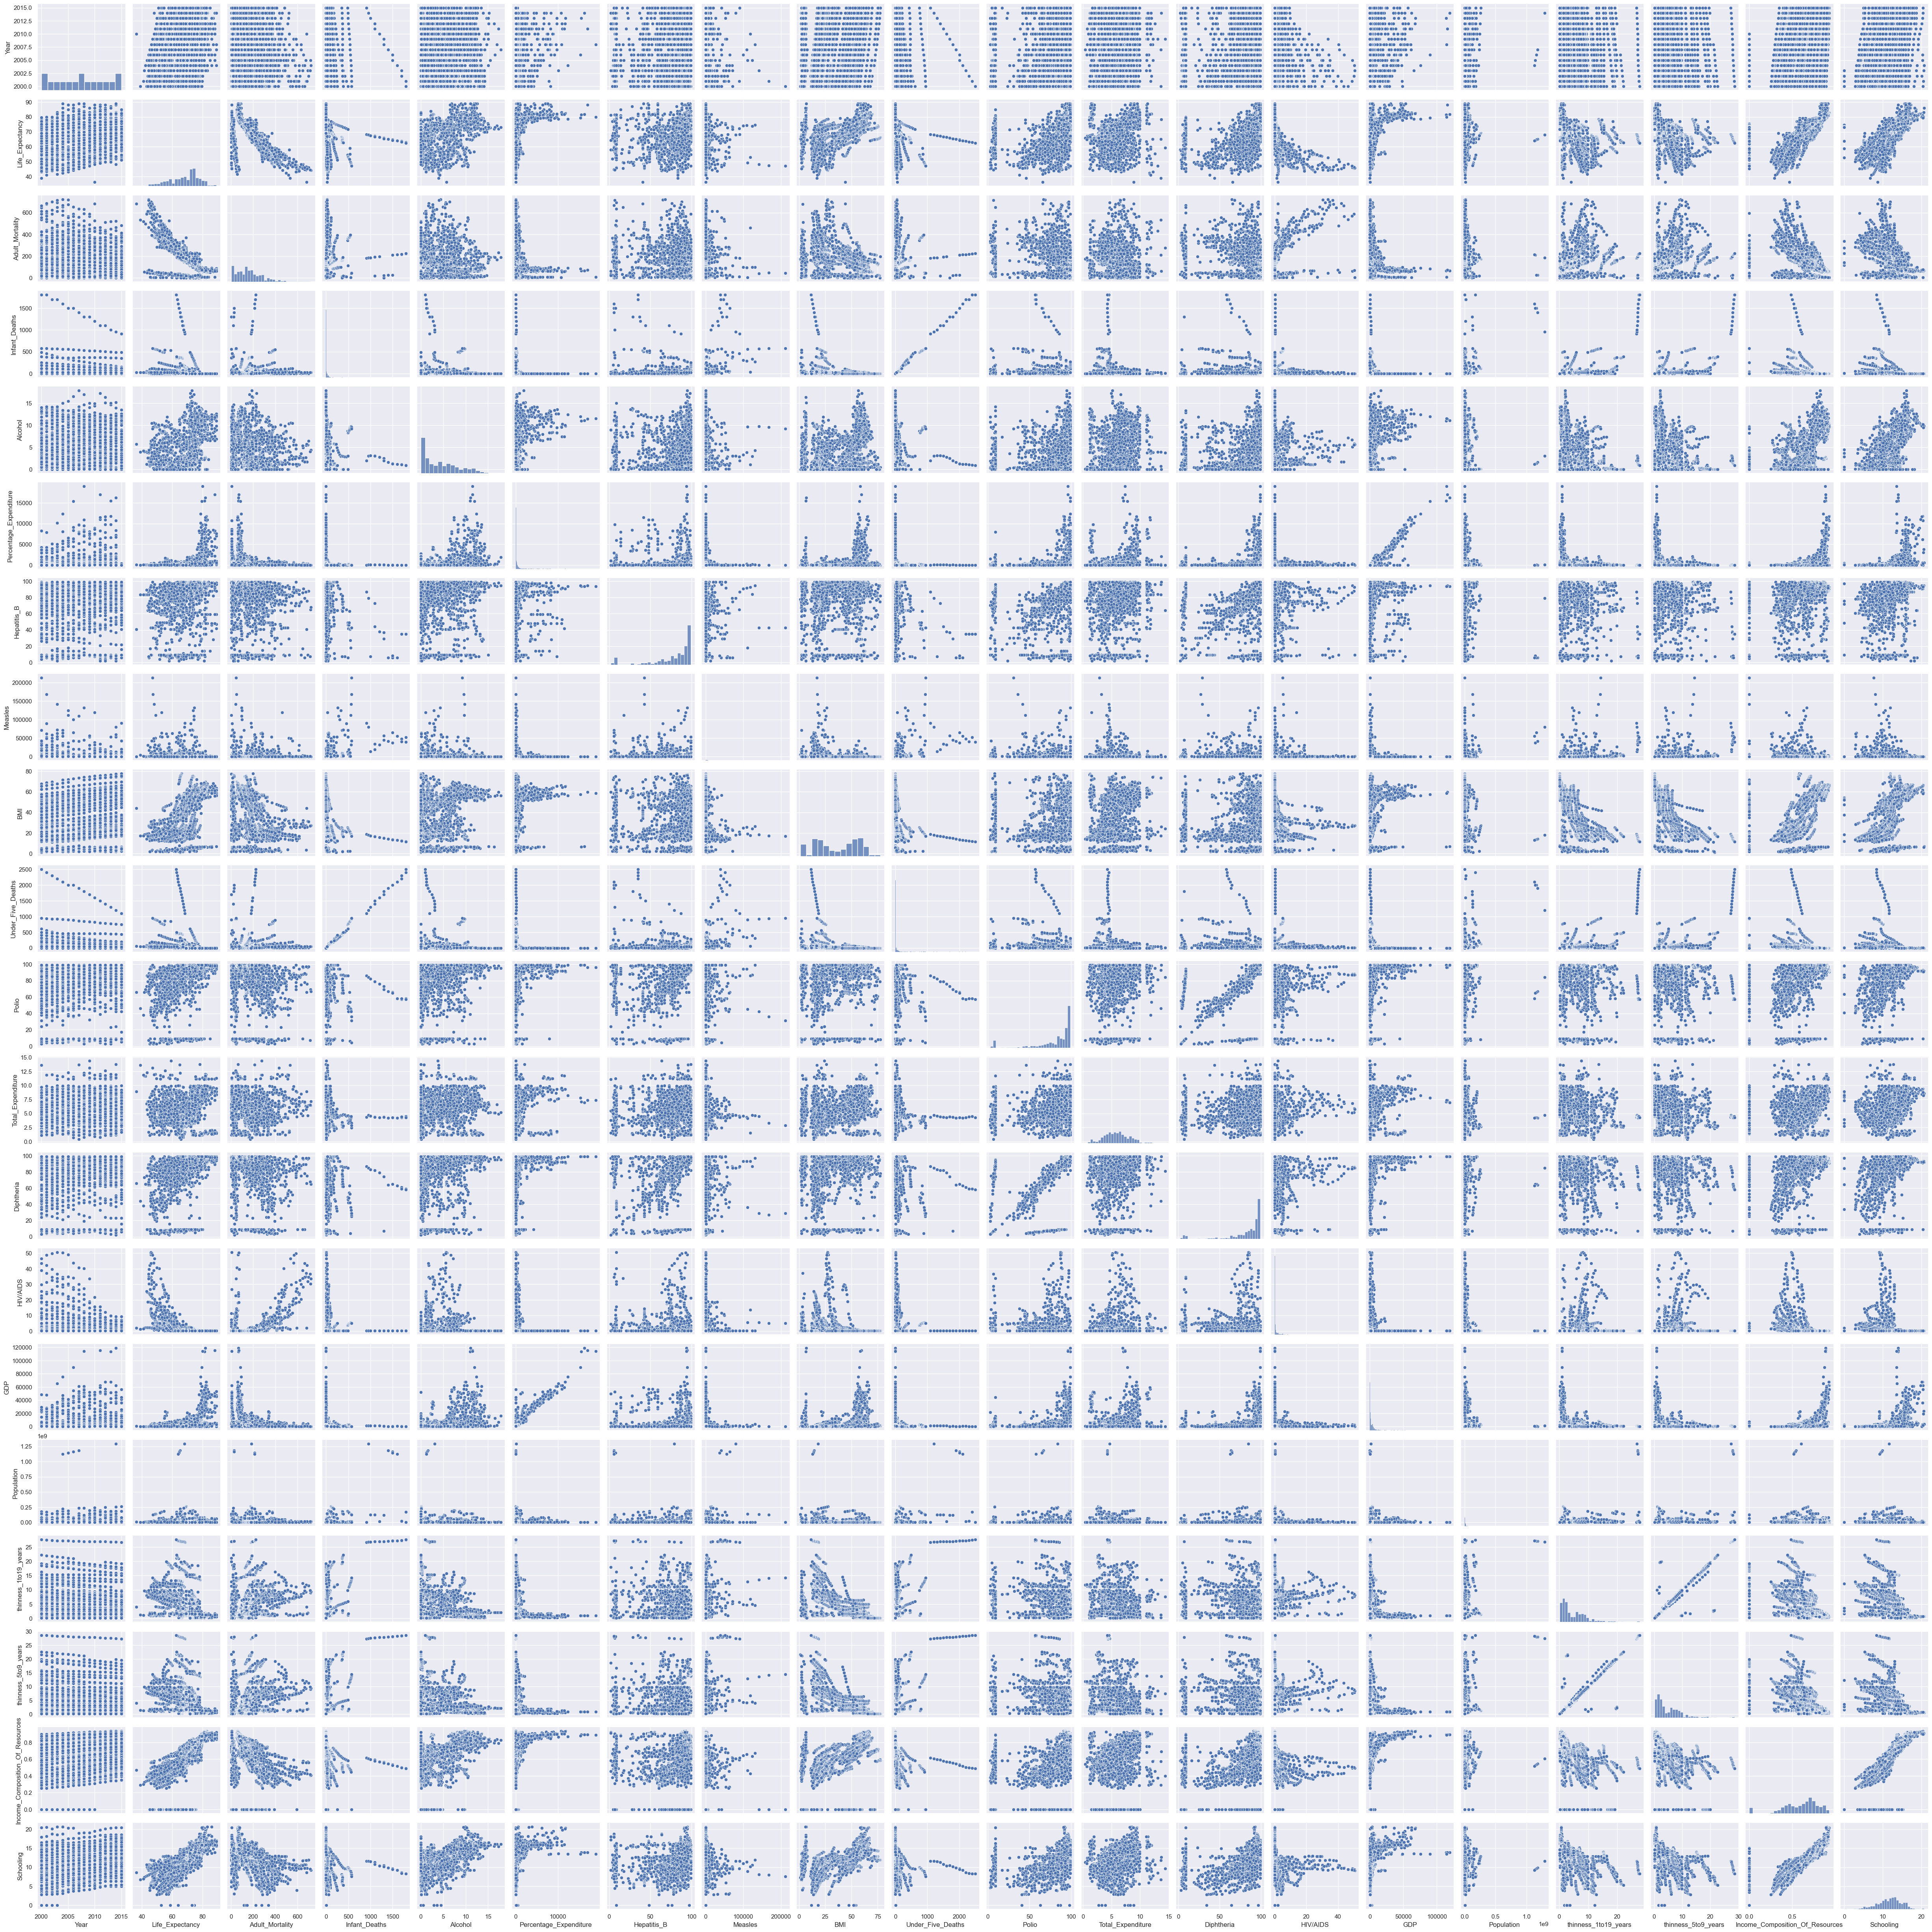

In [182]:
sns.pairplot(data)

plt.show()

***
***
***

# <span style="color: blue">  Plotting the characteristics between Status of countries and the average life expectancy</span>

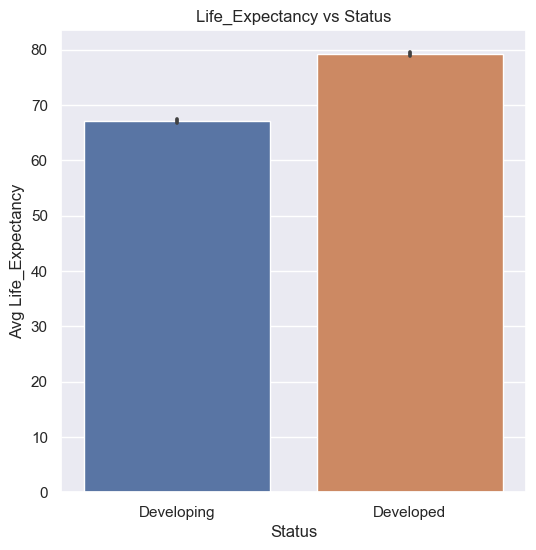

Life_Expectancy
Status                     
Developed             79.20
Developing            67.11

In [12]:
#As we have encoded Status Feture for correlation decoding here
data['Status'] = data['Status'].replace([0, 1], ['Developing', 'Developed'])
sns.set(rc={'figure.figsize':(6,6)})# Set up the seaborn figure

#Draw the barplot with country status and life expectancy variable
sns.barplot(data=data, y='Life_Expectancy',x='Status', orient = 'v')

#Adding the lable and title to the plot
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy vs Status")

plt.show()

#Finding thethe average life expectancy between both status. 
round(data[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)


In [ ]:
sns.scatterplot(data["GDP"],data["Life_Expectancy"],hue=data["Status"])

We can see from the two graphs above that developed countries have more life expectancy than in developing countries

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
wins_data.Status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
wins_data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

# <span style="color: blue">  Life expectancy evolution</span>

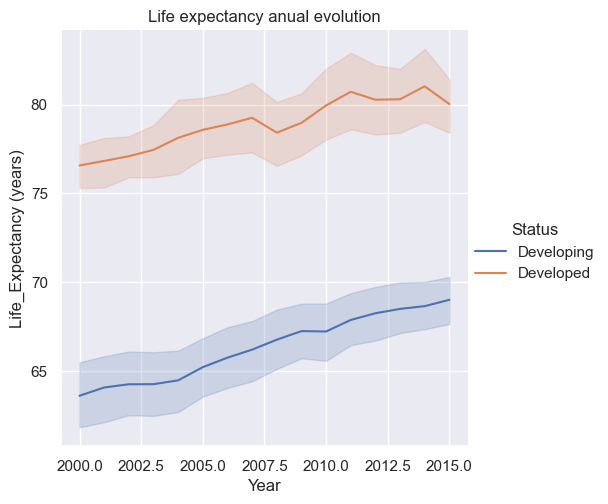

In [184]:
sns.relplot(x="Year", y="Life_Expectancy", kind="line", hue="Status",data=data)
plt.title("Life expectancy anual evolution", fontsize=12)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life_Expectancy (years)")
plt.show()

## <span style="color: blue">  GDP and Life_expectancy_over time</span>

In [185]:
x = data[['GDP']]
y = data['Life_Expectancy']

In [186]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split


<b> Initializing linear regresssion model

In [187]:
reg=linear_model.LinearRegression()

In [188]:
#train the model 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)


In [189]:
x_train

GDP
2447   216.68
1608   597.17
95    7669.27
250  36967.28
1895  2996.96
...       ...
2745   635.79
1104    39.49
2537  1087.44
1943  1316.99
148   7189.69

[1489 rows x 1 columns]

In [190]:
y_train

2447   71.80
1608   76.30
95     74.10
250    78.90
1895   53.20
        ... 
2745   67.50
1104   52.50
2537   64.50
1943   66.20
148    71.60
Name: Life_Expectancy, Length: 1489, dtype: float64

In [191]:
x_train, x_test, y_train, y_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1489, 1), (1489,), (639, 1), (639,))

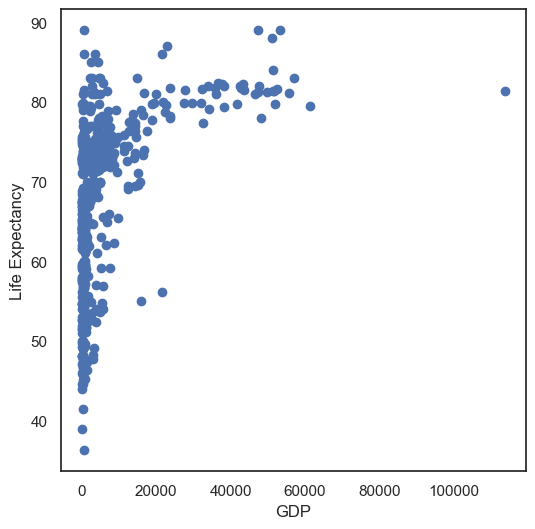

In [192]:
plt.scatter(x_test, y_test)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

<b> Trainig the model and fitting the model with trainig data

<b> Spliting Data

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error as mse , r2_score


In [400]:
model=reg.fit(x_train, y_train)
model

LinearRegression()

In [401]:
y_preds_train = model.predict(x_train)
y_preds_test = model.predict(x_test)

In [409]:
print("R-squared of the model in training set is: {}".format(model.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.21270069316846307
-----Test set statistics-----
R-squared of the model in test set is: 0.15867544918108245
Mean absolute error of the prediction is: 7.019591785836645
Mean squared error of the prediction is: 75.76893446915957
Mean absolute percentage error of the prediction is: 11.025144338163527


## <span style="color: blue">  Plotting Actual vs Predicted</span>

In [360]:
predictions = model.predict(x)
predictions


array([66.2548952 , 66.26551911, 66.27263544, ..., 66.05804615,
       66.24156851, 66.24110958])

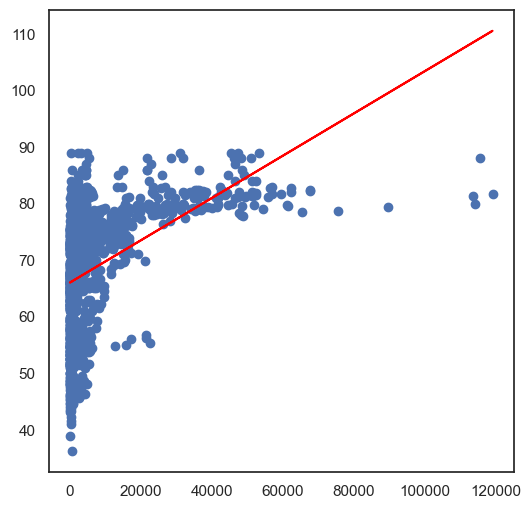

In [361]:
plt.scatter(x, y)
plt.plot(x, predictions, color="red")
plt.show()

In [368]:
y_predict = model.predict(x_test)
print(f"Train accuracy {round(model.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(model.score(x_test,y_test)*100,2)} %")

Train accuracy 20.45 %
Test accuracy 17.08 %


#A) according to the test run, variation in country GDP explains roughly 20% of the variation in life expectancy 
#B) there appears to be a positive correlation between GDP and life expectancy 
#C) there is roughly a few percentage points' differency in the accuracy of the train and test sets

# <span style="color: blue"> Regression Plots</span>

<AxesSubplot:xlabel='BMI', ylabel='Life_Expectancy'>

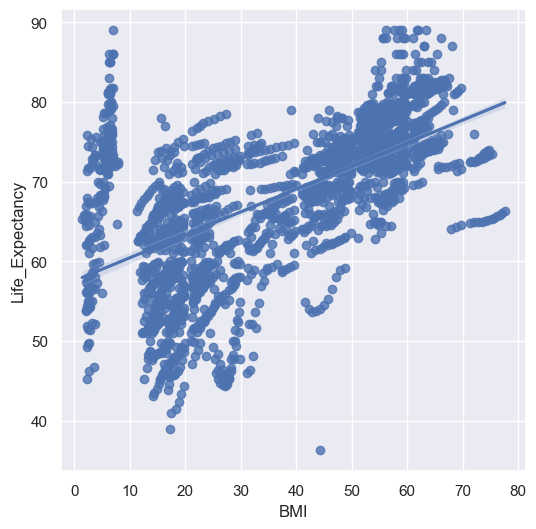

In [631]:
sns.regplot(x = "BMI", y = "Life_Expectancy",data = data)

<AxesSubplot:xlabel='Income_Composition_Of_Resources', ylabel='Life_Expectancy'>

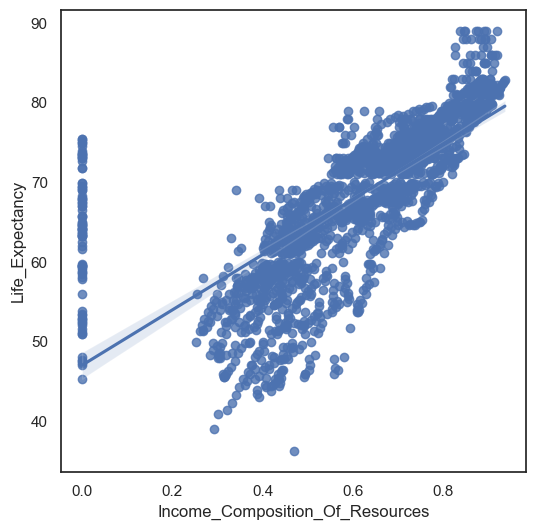

In [194]:
sns.regplot(x = "Income_Composition_Of_Resources", y = "Life_Expectancy",data = data)

<AxesSubplot:xlabel='Adult_Mortality', ylabel='Life_Expectancy'>

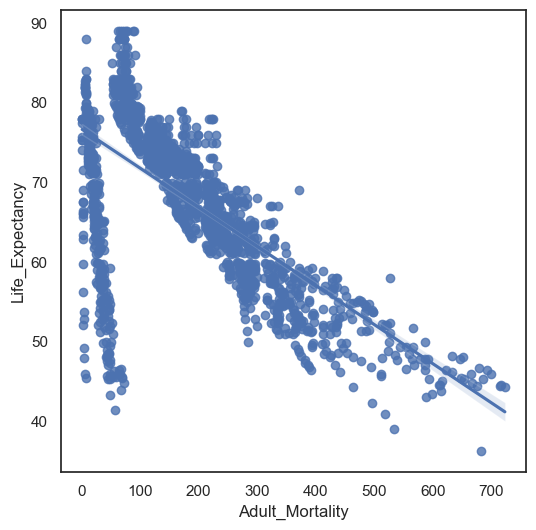

In [195]:
sns.regplot(x = "Adult_Mortality", y = "Life_Expectancy",data = data)

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

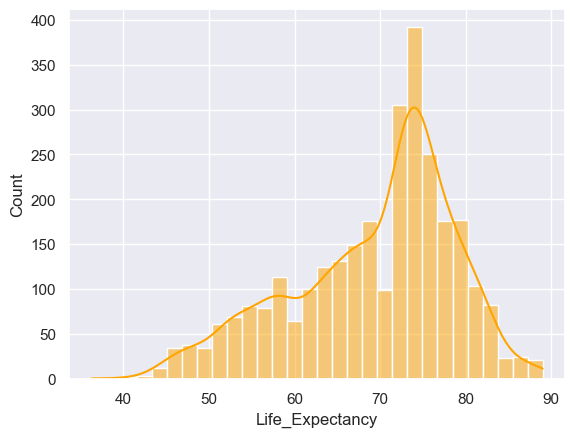

In [11]:
sns.histplot(data["Life_Expectancy"],kde=True ,color='orange')

people have life expectancy between 70-80 years, that means I have 60 more years

# <span style="color: blue">CONCLUSION</span>

In [ ]:

The dataset although collected by WHO contained a lot of missing values and we saw that most of the missing values 
were from the countries with very less population and were data collection is a very tedious task.

A lot of outliers were detected which were dealt by Winsorization

Japan although being hit badly by world war II came back very strong and is currently the country with the highest life
expectancy followed by Sweden which is a big Achievement.

We largely saw how developing countries have very less life expectancy when we see diseases like HIV/AIDS, polio etc and
how Schooling plays a big role in increasing the life expectancy of developing countries as people become much more 
educated and help improve the welfare and healthcare of the country along with economy

Alcoholism is a big issue in the developed country where people have good amount of money to spend and this shows
how careless are people in terms of their health when it comes to alcoholism

# <span style="color: green">Here your amazing dashboards for better understanding </span>

[Dashboard](https://public.tableau.com/views/Life_Expectancy_Calculation/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link/koolac "Just click it")

***
***
 # <span style="color: blue">THANK YOU</span>